In [18]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(Matrix)
    library(Seurat)
    library(R.utils)
})

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'tibble' was built under R version 4.4.2"
Warning message:
"package 'tidyr' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
Warning message:
"package 'data.table' was built under R version 4.4.2"


### Read in the data

In [19]:
postTrans <- readRDS(file = "Data/seu.integrated.resolution_search.rds")
postTrans

An object of class Seurat 
36601 features across 24606 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, umap, integrated.harmony

In [20]:
head(postTrans)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,barcode,CD34_subsample,CD34,nCount_HTO,nFeature_HTO,⋯,seurat_clusters_resolution_0.1,seurat_clusters_resolution_0.2,seurat_clusters_resolution_0.3,seurat_clusters_resolution_0.4,seurat_clusters_resolution_0.5,seurat_clusters_resolution_0.6,seurat_clusters_resolution_0.7,seurat_clusters_resolution_0.8,seurat_clusters_resolution_0.9,seurat_clusters_resolution_1
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
A_AAACGCTTCACTTGTT_A_pos,BMT_A,29477,6684,2.337416,A,AAACGCTTCACTTGTT_A_pos,pos,pos,12.98252,7,⋯,1,4,4,4,4,4,3,4,4,4
A_AAAGGATCAATGCAGG_A_pos,BMT_A,43334,7226,5.169151,A,AAAGGATCAATGCAGG_A_pos,pos,pos,15.07064,7,⋯,3,5,5,5,8,8,9,12,8,9
A_AAAGGATGTGCGAGTA_A_pos,BMT_A,46221,7362,4.013327,A,AAAGGATGTGCGAGTA_A_pos,pos,pos,15.09084,7,⋯,1,4,4,4,4,4,3,4,4,4
A_AAAGGATTCACTGATG_A_pos,BMT_A,25484,4623,7.243761,A,AAAGGATTCACTGATG_A_pos,pos,pos,15.47098,7,⋯,3,5,5,5,5,5,4,3,3,2
A_AAAGGGCCACCCTCTA_A_pos,BMT_A,28699,6420,2.871180,A,AAAGGGCCACCCTCTA_A_pos,pos,pos,13.40386,7,⋯,4,6,7,7,6,6,6,7,6,7
A_AAAGGTAGTCGCATCG_A_pos,BMT_A,20363,4041,4.262633,A,AAAGGTAGTCGCATCG_A_pos,pos,pos,13.97667,7,⋯,1,2,2,2,3,2,2,6,5,5
A_AAAGGTATCATTGTGG_A_pos,BMT_A,31372,6826,6.802244,A,AAAGGTATCATTGTGG_A_pos,pos,pos,14.06007,7,⋯,1,4,2,4,3,2,2,4,4,4
A_AAAGGTATCCGAGGCT_A_pos,BMT_A,31802,5299,6.716559,A,AAAGGTATCCGAGGCT_A_pos,pos,pos,13.56754,7,⋯,0,1,1,0,14,15,18,10,7,8
A_AAAGGTATCGGTCACG_A_pos,BMT_A,48519,7748,6.618026,A,AAAGGTATCGGTCACG_A_pos,pos,pos,13.91961,7,⋯,0,1,1,0,0,0,0,1,2,8


In [21]:
posttrans_plot <- UMAPPlot(postTrans) + scale_x_reverse()

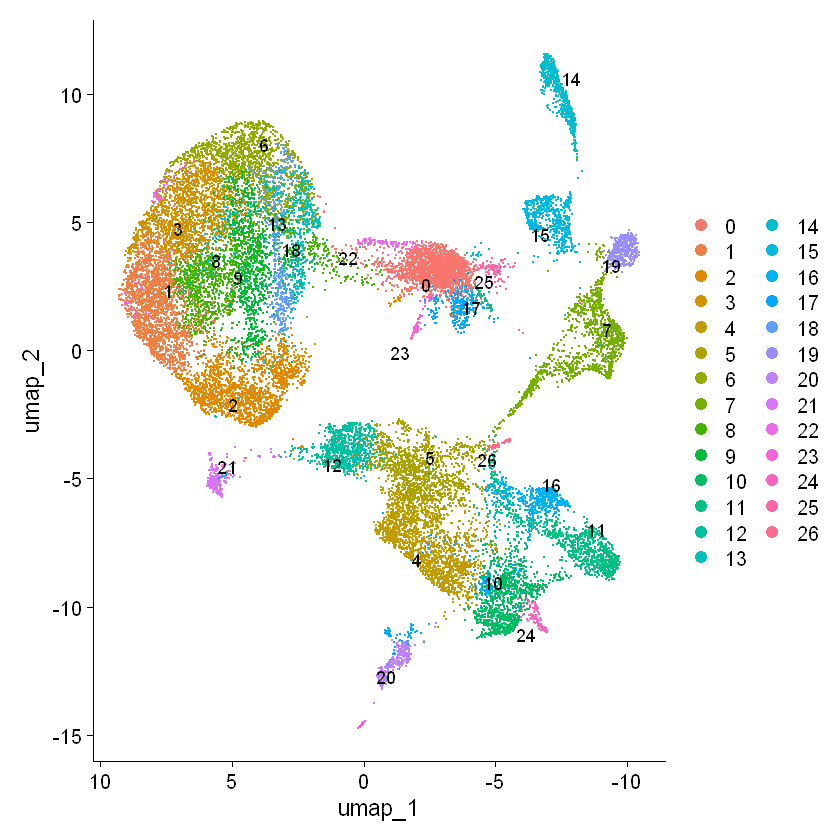

In [22]:
LabelClusters(plot = posttrans_plot, id = "ident")

### Filtering the data

In [23]:
postTrans_rev <- subset(postTrans, subset = (percent.mt <= 10))

In [24]:
head(postTrans_rev)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,barcode,CD34_subsample,CD34,nCount_HTO,nFeature_HTO,⋯,seurat_clusters_resolution_0.1,seurat_clusters_resolution_0.2,seurat_clusters_resolution_0.3,seurat_clusters_resolution_0.4,seurat_clusters_resolution_0.5,seurat_clusters_resolution_0.6,seurat_clusters_resolution_0.7,seurat_clusters_resolution_0.8,seurat_clusters_resolution_0.9,seurat_clusters_resolution_1
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
A_AAACGCTTCACTTGTT_A_pos,BMT_A,29477,6684,2.337416,A,AAACGCTTCACTTGTT_A_pos,pos,pos,12.98252,7,⋯,1,4,4,4,4,4,3,4,4,4
A_AAAGGATCAATGCAGG_A_pos,BMT_A,43334,7226,5.169151,A,AAAGGATCAATGCAGG_A_pos,pos,pos,15.07064,7,⋯,3,5,5,5,8,8,9,12,8,9
A_AAAGGATGTGCGAGTA_A_pos,BMT_A,46221,7362,4.013327,A,AAAGGATGTGCGAGTA_A_pos,pos,pos,15.09084,7,⋯,1,4,4,4,4,4,3,4,4,4
A_AAAGGATTCACTGATG_A_pos,BMT_A,25484,4623,7.243761,A,AAAGGATTCACTGATG_A_pos,pos,pos,15.47098,7,⋯,3,5,5,5,5,5,4,3,3,2
A_AAAGGGCCACCCTCTA_A_pos,BMT_A,28699,6420,2.871180,A,AAAGGGCCACCCTCTA_A_pos,pos,pos,13.40386,7,⋯,4,6,7,7,6,6,6,7,6,7
A_AAAGGTAGTCGCATCG_A_pos,BMT_A,20363,4041,4.262633,A,AAAGGTAGTCGCATCG_A_pos,pos,pos,13.97667,7,⋯,1,2,2,2,3,2,2,6,5,5
A_AAAGGTATCATTGTGG_A_pos,BMT_A,31372,6826,6.802244,A,AAAGGTATCATTGTGG_A_pos,pos,pos,14.06007,7,⋯,1,4,2,4,3,2,2,4,4,4
A_AAAGGTATCCGAGGCT_A_pos,BMT_A,31802,5299,6.716559,A,AAAGGTATCCGAGGCT_A_pos,pos,pos,13.56754,7,⋯,0,1,1,0,14,15,18,10,7,8
A_AAAGGTATCGGTCACG_A_pos,BMT_A,48519,7748,6.618026,A,AAAGGTATCGGTCACG_A_pos,pos,pos,13.91961,7,⋯,0,1,1,0,0,0,0,1,2,8


In [25]:
postTrans_rev_plot <- UMAPPlot(postTrans_rev) + scale_x_reverse()

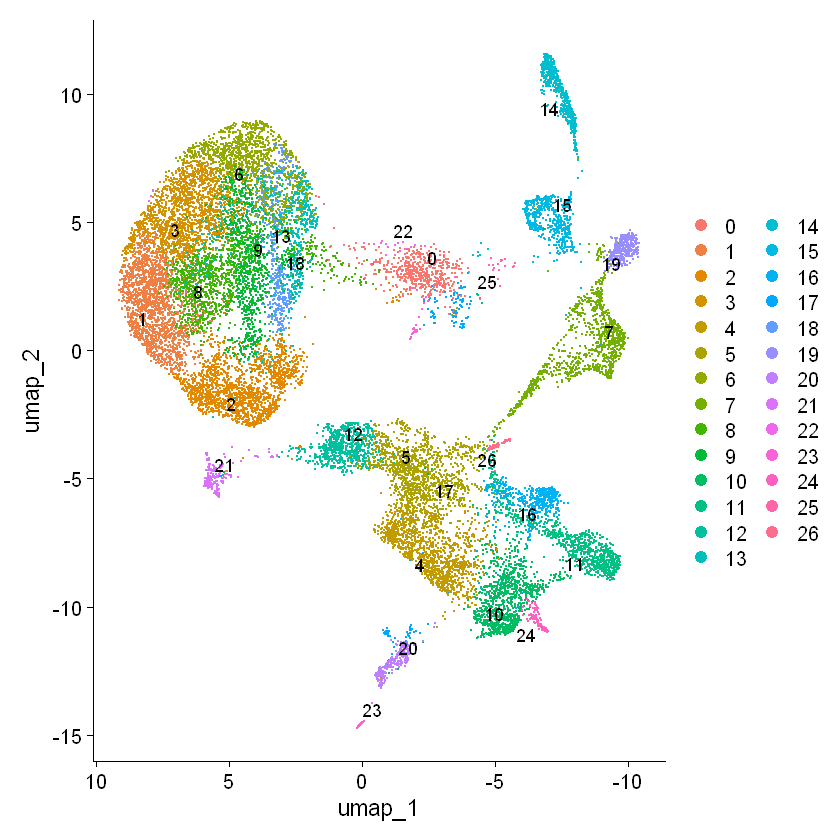

In [26]:
LabelClusters(plot = postTrans_rev_plot, id = "ident")

In [27]:
rownames(postTrans_rev)

[1] "MIR1302-2HG"       "FAM138A"           "OR4F5"            
    [4] "AL627309.1"        "AL627309.3"        "AL627309.2"       
    [7] "AL627309.5"        "AL627309.4"        "AP006222.2"       
   [10] "AL732372.1"        "OR4F29"            "AC114498.1"       
   [13] "OR4F16"            "AL669831.2"        "LINC01409"        
   [16] "FAM87B"            "LINC01128"         "LINC00115"        
   [19] "FAM41C"            "AL645608.6"        "AL645608.2"       
   [22] "AL645608.4"        "LINC02593"         "SAMD11"           
   [25] "NOC2L"             "KLHL17"            "PLEKHN1"          
   [28] "PERM1"             "AL645608.7"        "HES4"             
   [31] "ISG15"             "AL645608.1"        "AGRN"             
   [34] "AL645608.5"        "AL645608.8"        "RNF223"           
   [37] "C1orf159"          "AL390719.3"        "LINC01342"        
   [40] "AL390719.2"        "TTLL10-AS1"        "TTLL10"           
   [43] "TNFRSF18"          "TNFRSF4"           "SDF4"             
   [46] "B3GALT6"           "C1QTNF12"          "AL162741.1"       
   [49] "UBE2J2"            "LINC01786"         "SCNN1D"           
   [52] "ACAP3"             "PUSL1"             "INTS11"           
   [55] "AL139287.1"        "CPTP"              "TAS1R3"           
   [58] "DVL1"              "MXRA8"             "AURKAIP1"         
   [61] "CCNL2"             "MRPL20-AS1"        "MRPL20"           
   [64] "AL391244.2"        "ANKRD65"           "AL391244.1"       
   [67] "TMEM88B"           "LINC01770"         "VWA1"             
   [70] "ATAD3C"            "ATAD3B"            "ATAD3A"           
   [73] "TMEM240"           "SSU72"             "AL645728.1"       
   [76] "FNDC10"            "AL691432.4"        "AL691432.2"       
   [79] "MIB2"              "MMP23B"            "CDK11B"           
   [82] "FO704657.1"        "SLC35E2B"          "CDK11A"           
   [85] "SLC35E2A"          "NADK"              "GNB1"             
   [88] "AL109917.1"        "CALML6"            "TMEM52"           
   [91] "CFAP74"            "AL391845.2"        "GABRD"            
   [94] "AL391845.1"        "PRKCZ"             "AL590822.2"       
   [97] "PRKCZ-AS1"         "FAAP20"            "AL590822.1"       
  [100] "SKI"               "AL590822.3"        "MORN1"            
  [103] "AL589739.1"        "AL513477.2"        "RER1"             
  [106] "PEX10"             "PLCH2"             "AL139246.1"       
  [109] "AL139246.4"        "PANK4"             "HES5"             
  [112] "AL139246.5"        "TNFRSF14-AS1"      "TNFRSF14"         
  [115] "AL139246.3"        "PRXL2B"            "MMEL1"            
  [118] "AL831784.1"        "TTC34"             "AC242022.2"       
  [121] "AC242022.1"        "AL592464.2"        "AL592464.3"       
  [124] "AL592464.1"        "AL589702.1"        "ACTRT2"           
  [127] "PRDM16-DT"         "PRDM16"            "AL008733.1"       
  [130] "AL590438.1"        "AL354743.2"        "AL354743.1"       
  [133] "ARHGEF16"          "AL512413.1"        "MEGF6"            
  [136] "AL513320.1"        "TPRG1L"            "WRAP73"           
  [139] "TP73"              "AL136528.1"        "AL136528.2"       
  [142] "CCDC27"            "SMIM1"             "LRRC47"           
  [145] "AL365330.1"        "CEP104"            "DFFB"             
  [148] "C1orf174"          "LINC01134"         "LINC01346"        
  [151] "LINC01345"         "LINC02780"         "AL805961.1"       
  [154] "LINC01777"         "AL355602.1"        "Z98747.1"         
  [157] "LINC01646"         "AJAP1"             "Z98886.1"         
  [160] "BX005132.1"        "LINC02781"         "LINC02782"        
  [163] "AL139823.1"        "Z98259.3"          "Z98259.2"         
  [166] "Z98259.1"          "AL365255.1"        "NPHP4"            
  [169] "KCNAB2"            "CHD5"              "RPL22"            
  [172] "AL031847.1"        "RNF207"            "ICMT"             
  [175] "LINC00337"         "HES3"              "GPR153"    

In [28]:
nrow(postTrans_rev)

[1] 36601

In [29]:
colnames(postTrans_rev)

[1] "A_AAACGCTTCACTTGTT_A_pos"  "A_AAAGGATCAATGCAGG_A_pos" 
    [3] "A_AAAGGATGTGCGAGTA_A_pos"  "A_AAAGGATTCACTGATG_A_pos" 
    [5] "A_AAAGGGCCACCCTCTA_A_pos"  "A_AAAGGTAGTCGCATCG_A_pos" 
    [7] "A_AAAGGTATCATTGTGG_A_pos"  "A_AAAGGTATCCGAGGCT_A_pos" 
    [9] "A_AAAGGTATCGGTCACG_A_pos"  "A_AAAGGTATCTCGCAGG_A_pos" 
   [11] "A_AAAGTGACAAAGTATG_A_pos"  "A_AACAAAGAGGGCCCTT_A_pos" 
   [13] "A_AACAAAGGTGCTCTTC_A_pos"  "A_AACAAAGTCTGCATAG_A_pos" 
   [15] "A_AACACACAGCAAACAT_A_pos"  "A_AACACACAGCGAGGAG_A_pos" 
   [17] "A_AACACACTCTCAATCT_A_pos"  "A_AACCAACCAGAACCGA_A_pos" 
   [19] "A_AACCACAAGTCAACAA_A_pos"  "A_AACCACATCCATTGTT_A_pos" 
   [21] "A_AACCATGCAGTTCTAG_A_pos"  "A_AACCTGATCAAACGAA_A_pos" 
   [23] "A_AACGAAAAGTTGTCAC_A_pos"  "A_AACGGGAGTTGCAAGG_A_pos" 
   [25] "A_AACTTCTGTGTAAATG_A_pos"  "A_AACTTCTTCAGTGGGA_A_pos" 
   [27] "A_AACTTCTTCATGGAGG_A_pos"  "A_AAGACAAGTCAACGCC_A_pos" 
   [29] "A_AAGACTCGTGAATGAT_A_pos"  "A_AAGATAGCAATGCAAA_A_pos" 
   [31] "A_AAGATAGCACAGTCGC_A_pos"  "A_AAGATAGCAGTCAGTT_A_pos" 
   [33] "A_AAGATAGTCTCACGAA_A_pos"  "A_AAGCATCAGGCCGCTT_A_pos" 
   [35] "A_AAGCATCGTCATACCA_A_pos"  "A_AAGCCATCAATCTGCA_A_pos" 
   [37] "A_AAGCGTTAGTCCTGTA_A_pos"  "A_AAGGAATCACCCTATC_A_pos" 
   [39] "A_AAGGAATCATTGACAC_A_pos"  "A_AAGGTAAGTTCAGGTT_A_pos" 
   [41] "A_AAGTACCGTTGCGAAG_A_pos"  "A_AAGTCGTCAGTGAGCA_A_pos" 
   [43] "A_AAGTGAAGTATGTGTC_A_pos"  "A_AAGTGAAGTGACGTCC_A_pos" 
   [45] "A_AAGTTCGAGTCGAAAT_A_pos"  "A_AATAGAGAGTACAGCG_A_pos" 
   [47] "A_AATCACGGTATGAAGT_A_pos"  "A_AATCGACCAACTGGTT_A_pos" 
   [49] "A_AATCGACCAATTGAAG_A_pos"  "A_AATCGTGAGGCTCTAT_A_pos" 
   [51] "A_AATCGTGGTAGTCGTT_A_pos"  "A_AATGAAGGTGAGCAGT_A_pos" 
   [53] "A_AATGACCGTCCTGTTC_A_pos"  "A_AATGCCACAACTCATG_A_pos" 
   [55] "A_AATGCCAGTCACCTTC_A_pos"  "A_AATGCCATCCCAAGCG_A_pos" 
   [57] "A_AATGGAACAGATGCGA_A_pos"  "A_AATGGAAGTAGACGGT_A_pos" 
   [59] "A_AATGGCTGTATCGTAC_A_pos"  "A_AATTTCCAGGGTATAT_A_pos" 
   [61] "A_AATTTCCGTACAGGTG_A_pos"  "A_ACAAAGACAAGTAGTA_A_pos" 
   [63] "A_ACAACCAAGTTGCCCG_A_pos"  "A_ACAACCACATGAATAG_A_pos" 
   [65] "A_ACAAGCTCATCGTGGC_A_pos"  "A_ACACAGTCAAATGCTC_A_pos" 
   [67] "A_ACACCAACAACTCGAT_A_pos"  "A_ACACCAAGTATCGTGT_A_pos" 
   [69] "A_ACACTGAAGTCCTGCG_A_pos"  "A_ACACTGAGTACCGTGC_A_pos" 
   [71] "A_ACAGCCGTCTAGTACG_A_pos"  "A_ACAGGGATCTGCGGGT_A_pos" 
   [73] "A_ACATCCCTCTCGTCAC_A_pos"  "A_ACATCGAGTATTGAGA_A_pos" 
   [75] "A_ACATCGAGTGAGTGAC_A_pos"  "A_ACATGCATCTCGACGG_A_pos" 
   [77] "A_ACATTTCTCATCCCGT_A_pos"  "A_ACCAAACAGGATATAC_A_pos" 
   [79] "A_ACCACAAGTGACCTGC_A_pos"  "A_ACCATTTTCGATAACC_A_pos" 
   [81] "A_ACCCAAACATCCTGTC_A_pos"  "A_ACCCTCAGTCTGCAAT_A_pos" 
   [83] "A_ACCCTTGAGCCGAACA_A_pos"  "A_ACCCTTGCAATTTCCT_A_pos" 
   [85] "A_ACCCTTGGTCAGTCTA_A_pos"  "A_ACCTGAAAGCCTATCA_A_pos" 
   [87] "A_ACCTGAATCAGAGTGG_A_pos"  "A_ACCTGTCGTCGAGTGA_A_pos" 
   [89] "A_ACCTGTCTCATGAGAA_A_pos"  "A_ACCTGTCTCGGTAGAG_A_pos" 
   [91] "A_ACGATCACACCATAAC_A_pos"  "A_ACGATCATCGCTGTTC_A_pos" 
   [93] "A_ACGATGTAGGGCATGT_A_pos"  "A_ACGATGTTCATGTCAG_A_pos" 
   [95] "A_ACGATGTTCCACCCTA_A_pos"  "A_ACGCACGAGTCGGCCT_A_pos" 
   [97] "A_ACGCACGGTAGCGCTC_A_pos"  "A_ACGGAAGGTTGCAAGG_A_pos" 
   [99] "A_ACGGGTCAGTCCTGTA_A_pos"  "A_ACGGGTCCATCCAACA_A_pos" 
  [101] "A_ACGGTTAGTTATAGAG_A_pos"  "A_ACGTAACCATCCTATT_A_pos" 
  [103] "A_ACGTAACTCCCACAGG_A_pos"  "A_ACGTAACTCTGTACAG_A_pos" 
  [105] "A_ACGTACAAGTAAGCAT_A_pos"  "A_ACGTACATCCTGCTAC_A_pos" 
  [107] "A_ACGTCCTTCTCCTGAC_A_pos"  "A_ACGTTCCGTCGCACAC_A_pos" 
  [109] "A_ACGTTCCTCCTACCGT_A_pos"  "A_ACGTTCCTCTACTTCA_A_pos" 
  [111] "A_ACTACGAAGCTCCACG_A_pos"  "A_ACTACGACAAGAGATT_A_pos" 
  [113] "A_ACTACGAGTGTCCGGT_A_pos"  "A_ACTACGAGTTGCTCAA_A_pos" 
  [115] "A_ACTACGATCTATGCCC_A_pos"  "A_ACTATCTAGAAACTAC_A_pos" 
  [117] "A_ACTATCTAGACTCTTG_A_pos"  "A_ACTATGGAGAAGTCAT_A_pos" 
  [119] "A_ACTATGGCACGGATCC_A_pos"  "A_ACTATGGCACGGTGTC_A_pos" 
  [121] "A_ACTATGGTCCATAAGC_A_pos"  "A_ACTATTCCAACTGGTT_A_pos" 
  [123] "A_ACTATTCCATCCGTTC_A_pos"  "A_ACTATTCTCCCTTGGT_A_pos" 
  [125] "A_ACTCCCAAGCGGGTTA_A_pos"  

In [30]:
ncol(postTrans_rev)

[1] 20229

### Import Nature Methods dataset

In [31]:
nature_spectra_path <- "cNMF4.spectra.k_35.dt_0_15.consensus.txt"

In [32]:
spectra.t <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header = TRUE, sep = "\t")
spectra.t

X,ABCA13,ABHD17B,ABHD8,ABLIM1,AC002480.5,AC002985.3,AC003664.1,AC004510.3,AC004691.5,⋯,ZNF720,ZNF726,ZNF76,ZNF770,ZNF790.AS1,ZNF792,ZNF829,ZNF98,ZRANB2,ZSCAN29
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.037138e-04,1.290061e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.561031e-05,⋯,3.200771e-04,0.000000e+00,1.795445e-04,2.639891e-05,0.000000e+00,0.000000e+00,3.220853e-04,0.000000e+00,3.323041e-04,1.046817e-03
2,1.626081e-03,1.903653e-04,5.273402e-04,6.913273e-04,4.248614e-04,1.121366e-04,2.541363e-04,3.616895e-04,2.634976e-04,⋯,8.402400e-04,1.331807e-03,1.071052e-03,5.805588e-04,4.699305e-04,4.034231e-04,8.789362e-04,7.264804e-04,5.293305e-04,8.734031e-04
3,4.665727e-08,1.557317e-04,0.000000e+00,8.398596e-04,3.834534e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,3.167402e-04,2.426609e-04,4.861702e-04,0.000000e+00,0.000000e+00,4.612713e-05,3.570141e-04,0.000000e+00,3.216228e-04,1.362637e-03
4,3.927303e-04,1.156419e-03,3.044580e-04,3.585300e-03,0.000000e+00,0.000000e+00,2.894145e-04,0.000000e+00,0.000000e+00,⋯,5.253167e-04,5.072930e-04,2.092257e-04,1.664867e-03,4.782508e-04,1.266647e-03,6.441579e-04,0.000000e+00,2.105280e-03,7.594478e-04
5,1.485559e-05,0.000000e+00,6.923341e-04,2.612954e-04,0.000000e+00,0.000000e+00,0.000000e+00,5.481140e-04,0.000000e+00,⋯,0.000000e+00,1.213477e-04,0.000000e+00,3.268598e-05,0.000000e+00,0.000000e+00,4.491670e-05,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.254937e-05,0.000000e+00,0.000000e+00,⋯,3.182447e-04,0.000000e+00,1.496780e-04,0.000000e+00,8.851968e-04,1.810611e-04,5.093236e-04,1.308876e-04,1.509837e-04,0.000000e+00
7,6.565215e-04,0.000000e+00,0.000000e+00,3.875568e-04,1.135598e-03,0.000000e+00,0.000000e+00,5.369790e-04,1.017732e-03,⋯,7.578034e-04,9.007138e-04,7.013929e-04,8.743214e-05,8.616086e-04,8.619480e-04,2.463427e-04,0.000000e+00,2.209803e-04,1.014350e-04
8,1.233864e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.096593e-04,0.000000e+00,⋯,0.000000e+00,1.490269e-03,0.000000e+00,2.679437e-04,6.120151e-04,6.869749e-05,1.956916e-04,0.000000e+00,1.165041e-03,1.698062e-05
9,4.239189e-06,0.000000e+00,1.606618e-04,2.035585e-04,5.098308e-04,2.671265e-04,2.714242e-05,3.574184e-04,0.000000e+00,⋯,0.000000e+00,3.563045e-04,4.717137e-05,3.107575e-04,2.348820e-04,7.746542e-04,1.970469e-04,1.803861e-04,5.928069e-05,1.671048e-04


### Running starCAT (w/o intersection)

In [67]:
postTrans_rev@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "percent.mt"                        
 [5] "sample"                             "barcode"                           
 [7] "CD34_subsample"                     "CD34"                              
 [9] "nCount_HTO"                         "nFeature_HTO"                      
[11] "Doublet_Scores"                     "Predicted_Status"                  
[13] "HTO_maxID"                          "HTO_secondID"                      
[15] "HTO_margin"                         "HTO_classification"                
[17] "HTO_classification.global"          "hash.ID"                           
[19] "adjusted.hash.ID"                   "RNA_snn_res.0.5"                   
[21] "seurat_clusters"                    "predicted.celltype.l2.score"       
[23] "predicted.celltype.l2"              "predicted.celltype.l1.score"       
[25] "predicted.celltype.l1"              "mapping.score"                     
[27] "patient"                            "timepoint"                         
[29] "bc_seq"                             "timepoint_category"                
[31] "leiden.cell_type"                   "azimuth.l2.less_granular.cell_type"
[33] "demultiplexed_bc"                   "unintegrated_clusters"             
[35] "RNA_snn_res.1"                      "transfer_name"                     
[37] "label"                              "seurat_clusters_resolution_0.1"    
[39] "seurat_clusters_resolution_0.2"     "seurat_clusters_resolution_0.3"    
[41] "seurat_clusters_resolution_0.4"     "seurat_clusters_resolution_0.5"    
[43] "seurat_clusters_resolution_0.6"     "seurat_clusters_resolution_0.7"    
[45] "seurat_clusters_resolution_0.8"     "seurat_clusters_resolution_0.9"    
[47] "seurat_clusters_resolution_1"

In [98]:
counts = postTrans_rev[["RNA"]]$counts

In [99]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
            A_AAACGCTTCACTTGTT_A_pos A_AAAGGATCAATGCAGG_A_pos
MIR1302-2HG                        .                        .
FAM138A                            .                        .
OR4F5                              .                        .
AL627309.1                         .                        .
AL627309.3                         .                        .
            A_AAAGGATGTGCGAGTA_A_pos A_AAAGGATTCACTGATG_A_pos
MIR1302-2HG                        .                        .
FAM138A                            .                        .
OR4F5                              .                        .
AL627309.1                         .                        .
AL627309.3                         .                        .
            A_AAAGGGCCACCCTCTA_A_pos
MIR1302-2HG                        .
FAM138A                            .
OR4F5                              .
AL627309.1                         .
AL627309.3                    

In [101]:
data_dir = "Data/First/"

In [102]:
# Output counts matrix
writeMM(counts, paste0(data_dir, 'matrix.mtx'))
gzip(paste0(data_dir, 'matrix.mtx'))

# Output cell barcodes
barcodes <- colnames(counts)
write_delim(as.data.frame(barcodes), paste0(data_dir, 'barcodes.tsv'),
           col_names = FALSE)
gzip(paste0(data_dir, 'barcodes.tsv'))

# Output feature names
gene_names <- rownames(counts)
features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
write_delim(as.data.frame(features),delim = "\t", paste0(data_dir, 'features.tsv'),
           col_names = FALSE)
gzip(paste0(data_dir, 'features.tsv'))

NULL

In [103]:
output_name = 'postTrans_starCAT'
counts_fn = paste0(data_dir, 'matrix.mtx.gz')

In [105]:
cmd = paste0('starcat', 
    ' --reference ', '"cNMF4.spectra.k_35.dt_0_15.consensus.txt"',
    ' --counts ', '"', counts_fn, '"', 
    ' --output-dir ', '"', data_dir, '"', 
    ' --name ', '"', output_name, '"' 
)
cmd

[1] "starcat --reference \"cNMF4.spectra.k_35.dt_0_15.consensus.txt\" --counts \"Data/matrix.mtx.gz\" --output-dir \"Data/\" --name \"postTrans_starCAT\""

```
starcat --reference "cNMF4.spectra.k_35.dt_0_15.consensus.txt" --counts "Data/matrix.mtx.gz" --output-dir "Data/" --name "postTrans_starCAT"
Using user specified reference spectra file cNMF4.spectra.k_35.dt_0_15.consensus.txt
No scores provided
1159 out of 2000 genes in the reference overlap with the query
C:\Users\Albert\AppData\Local\Programs\Python\Python312\Lib\site-packages\starcat\starcat.py:253: UserWarning: WARNING!: query input has 64 genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.
  warnings.warn("""WARNING!: query input has %d genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.""" % num_zeros, UserWarning)
Saving usages to Data/postTrans_starCAT.rf_usage_normalized.txt
```

### Running starCAT (w/ gene intersections)

#### Find intersection

In [5]:
data <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header=TRUE, sep="\t", check.names=FALSE)

In [6]:
write.csv(data, "cNMF4.spectra.k_35.dt_0_15.consensus.csv", row.names=FALSE)

In [7]:
gcontri <- read.csv("cNMF4.spectra.k_35.dt_0_15.consensus.csv")

In [8]:
head(gcontri)

,X,ABCA13,ABHD17B,ABHD8,ABLIM1,AC002480.5,AC002985.3,AC003664.1,AC004510.3,AC004691.5,⋯,ZNF720,ZNF726,ZNF76,ZNF770,ZNF790.AS1,ZNF792,ZNF829,ZNF98,ZRANB2,ZSCAN29
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.037138e-04,0.0001290061,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,2.561031e-05,⋯,0.0003200771,0.0000000000,0.0001795445,2.639891e-05,0.0000000000,0.000000e+00,0.0003220853,0.0000000000,0.0003323041,0.0010468175
2,2,1.626081e-03,0.0001903653,0.0005273402,0.0006913273,0.0004248614,0.0001121366,2.541363e-04,0.0003616895,2.634976e-04,⋯,0.0008402400,0.0013318075,0.0010710524,5.805588e-04,0.0004699305,4.034231e-04,0.0008789362,0.0007264804,0.0005293305,0.0008734031
3,3,4.665727e-08,0.0001557317,0.0000000000,0.0008398596,0.0003834534,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,⋯,0.0003167402,0.0002426609,0.0004861702,0.000000e+00,0.0000000000,4.612713e-05,0.0003570141,0.0000000000,0.0003216228,0.0013626373
4,4,3.927303e-04,0.0011564193,0.0003044580,0.0035852997,0.0000000000,0.0000000000,2.894145e-04,0.0000000000,0.000000e+00,⋯,0.0005253167,0.0005072930,0.0002092257,1.664867e-03,0.0004782508,1.266647e-03,0.0006441579,0.0000000000,0.0021052803,0.0007594478
5,5,1.485559e-05,0.0000000000,0.0006923341,0.0002612954,0.0000000000,0.0000000000,0.000000e+00,0.0005481140,0.000000e+00,⋯,0.0000000000,0.0001213477,0.0000000000,3.268598e-05,0.0000000000,0.000000e+00,0.0000449167,0.0000000000,0.0000000000,0.0000000000
6,6,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,3.254937e-05,0.0000000000,0.000000e+00,⋯,0.0003182447,0.0000000000,0.0001496780,0.000000e+00,0.0008851968,1.810611e-04,0.0005093236,0.0001308876,0.0001509837,0.0000000000


In [11]:
gcontri <- gcontri[, -1]

In [12]:
head(gcontri)

,ABCA13,ABHD17B,ABHD8,ABLIM1,AC002480.5,AC002985.3,AC003664.1,AC004510.3,AC004691.5,AC004869.3,⋯,ZNF720,ZNF726,ZNF76,ZNF770,ZNF790.AS1,ZNF792,ZNF829,ZNF98,ZRANB2,ZSCAN29
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.037138e-04,0.0001290061,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,2.561031e-05,8.771725e-05,⋯,0.0003200771,0.0000000000,0.0001795445,2.639891e-05,0.0000000000,0.000000e+00,0.0003220853,0.0000000000,0.0003323041,0.0010468175
2,1.626081e-03,0.0001903653,0.0005273402,0.0006913273,0.0004248614,0.0001121366,2.541363e-04,0.0003616895,2.634976e-04,4.880627e-04,⋯,0.0008402400,0.0013318075,0.0010710524,5.805588e-04,0.0004699305,4.034231e-04,0.0008789362,0.0007264804,0.0005293305,0.0008734031
3,4.665727e-08,0.0001557317,0.0000000000,0.0008398596,0.0003834534,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,7.430923e-04,⋯,0.0003167402,0.0002426609,0.0004861702,0.000000e+00,0.0000000000,4.612713e-05,0.0003570141,0.0000000000,0.0003216228,0.0013626373
4,3.927303e-04,0.0011564193,0.0003044580,0.0035852997,0.0000000000,0.0000000000,2.894145e-04,0.0000000000,0.000000e+00,0.000000e+00,⋯,0.0005253167,0.0005072930,0.0002092257,1.664867e-03,0.0004782508,1.266647e-03,0.0006441579,0.0000000000,0.0021052803,0.0007594478
5,1.485559e-05,0.0000000000,0.0006923341,0.0002612954,0.0000000000,0.0000000000,0.000000e+00,0.0005481140,0.000000e+00,0.000000e+00,⋯,0.0000000000,0.0001213477,0.0000000000,3.268598e-05,0.0000000000,0.000000e+00,0.0000449167,0.0000000000,0.0000000000,0.0000000000
6,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,3.254937e-05,0.0000000000,0.000000e+00,0.000000e+00,⋯,0.0003182447,0.0000000000,0.0001496780,0.000000e+00,0.0008851968,1.810611e-04,0.0005093236,0.0001308876,0.0001509837,0.0000000000


In [13]:
nrow(gcontri)

[1] 35

In [14]:
ncol(gcontri)

[1] 2000

In [16]:
colnames(gcontri)

[1] "ABCA13"          "ABHD17B"         "ABHD8"           "ABLIM1"         
   [5] "AC002480.5"      "AC002985.3"      "AC003664.1"      "AC004510.3"     
   [9] "AC004691.5"      "AC004869.3"      "AC005082.12"     "AC005160.3"     
  [13] "AC005618.6"      "AC005943.6"      "AC006116.12"     "AC006486.10"    
  [17] "AC006942.4"      "AC007091.1"      "AC007249.3"      "AC007325.2"     
  [21] "AC007557.1"      "AC008063.2"      "AC008073.7"      "AC008079.9"     
  [25] "AC008592.4"      "AC009133.21"     "AC009134.1"      "AC009336.19"    
  [29] "AC009506.1"      "AC010468.2"      "AC010731.3"      "AC010761.6"     
  [33] "AC010907.5"      "AC010974.3"      "AC012307.2"      "AC013269.4"     
  [37] "AC013463.2"      "AC015688.3"      "AC016991.1"      "AC017074.1"     
  [41] "AC018685.1"      "AC018816.3"      "AC020594.5"      "AC034228.4"     
  [45] "AC068831.3"      "AC073071.1"      "AC073316.1"      "AC092625.1"     
  [49] "AC093620.5"      "AC099668.5"      "AC104534.3"      "AC105053.3"     
  [53] "AC107057.1"      "AC114765.1"      "AC118345.1"      "AC118754.4"     
  [57] "AC127904.2"      "AC130689.5"      "AC131056.3"      "AC131263.1"     
  [61] "AC132217.4"      "AC136616.3"      "AC144568.2"      "AC144836.1"     
  [65] "AC233755.2"      "AC243756.1"      "ACTB"            "ACTG1"          
  [69] "ACTR2"           "ACTR5"           "ADAMTS1"         "ADAMTS19.AS1"   
  [73] "ADCYAP1R1"       "ADO"             "ADPRM"           "AF003626.1"     
  [77] "AF131215.9"      "AFAP1L1"         "AFP"             "AGAP4"          
  [81] "AGBL1"           "AGBL4.IT1"       "AHCTF1"          "AHSG"           
  [85] "AHSP"            "AK5"             "AKAP12"          "AKIRIN1"        
  [89] "AL049872.1"      "AL050303.10"     "AL357140.1"      "ALAD"           
  [93] "ALB"             "ALDH5A1"         "ALOX12B"         "ALOX5AP"        
  [97] "ALOXE3"          "ALYREF"          "ANKH"            "ANKIB1"         
 [101] "ANKRA2"          "ANKRD11"         "ANKRD22"         "ANKRD36C"       
 [105] "ANKRD50"         "ANKRD63"         "ANP32E"          "ANXA1"          
 [109] "ANXA2"           "ANXA5"           "AOC1"            "AP000251.3"     
 [113] "AP000431.2"      "AP000797.4"      "AP001055.6"      "AP001059.5"     
 [117] "AP001059.7"      "AP001464.4"      "AP001607.1"      "AP002856.7"     
 [121] "AP006748.1"      "AP1AR"           "AP1S2"           "AP2M1"          
 [125] "APLNR"           "APLP1"           "APOA1"           "APOA2"          
 [129] "APOBEC3B.AS1"    "APOC3"           "APOD"            "APOE"           
 [133] "APOH"            "APOLD1"          "APOOL"           "AQR"            
 [137] "AREG"            "ARF6"            "ARFGAP3"         "ARHGAP19"       
 [141] "ARHGEF2"         "ARID1A"          "ARL3"            "ARL4C"          
 [145] "ARL6IP1"         "ARMC5"           "ARMC9"           "ARNT"           
 [149] "ARPC5"           "ARPP21"          "ARV1"            "ASB15"          
 [153] "ASF1A"           "ASIC2"           "ASPM"            "ATF1"           
 [157] "ATF4"            "ATF5"            "ATP1B3"          "ATP2B2.IT2"     
 [161] "ATP2B4"          "ATP6AP2"         "ATP6V1C2"        "ATRX"           
 [165] "AURKB"           "AXIN2"           "AZIN1"           "AZU1"           
 [169] "B2M"             "BACE1.AS"        "BACH2"           "BARHL1"         
 [173] "BASP1"           "BAZ2A"           "BBC3"            "BCDIN3D"        
 [177] "BCL11A"          "BCL2L1"          "BCL6B"           "BCL7A"          
 [181] "BCLAF1"          "BCO1"            "BCOR"            "BCYRN1"         
 [185] "BIRC3"           "BLNK"            "BMI1"            "BOLL"           
 [189] "BPGM"            "BPTF"            "BTG1"            "BTG2"           
 [193] "BTN2A1"          "BX072566.1"      "C10orf10"        "C10orf71"       
 [197] "C11orf57"        "C16orf54"        "C17orf58"        "C19orf44"       
 [201] "C19orf68"        "C1QA"            "C1QB"    

In [33]:
common_genes <- intersect(rownames(postTrans_rev), colnames(gcontri))

In [36]:
common_genes

[1] "MXRA8"      "HES5"       "MEGF6"      "ZBTB48"     "AL357140.1"
   [6] "UBE4B"      "EXOSC10"    "HNRNPCL4"   "CASP9"      "C1QA"      
  [11] "C1QC"       "C1QB"       "LUZP1"      "HNRNPR"     "E2F2"      
  [16] "ID3"        "PNRC2"      "STMN1"      "DHDDS"      "HMGN2"     
  [21] "ARID1A"     "SFN"        "FCN3"       "TAF12"      "GMEB1"     
  [26] "LAPTM5"     "CCDC28B"    "GJA4"       "SFPQ"       "YRDC"      
  [31] "AKIRIN1"    "RLF"        "CDKN2C"     "CDCP2"      "PCSK9"     
  [36] "PLPP3"      "OMA1"       "JUN"        "USP1"       "MIER1"     
  [41] "GADD45A"    "LRRC40"     "ZRANB2"     "AK5"        "RPF1"      
  [46] "LMO4"       "RTCA"       "SLC25A24"   "HENMT1"     "PRPF38B"   
  [51] "STXBP3"     "CLCC1"      "CELSR2"     "LRIF1"      "RAP1A"     
  [56] "VTCN1"      "ZNF697"     "TXNIP"      "FMO5"       "GJA5"      
  [61] "ANP32E"     "MCL1"       "CTSS"       "ARNT"       "OAZ3"      
  [66] "S100A10"    "S100A11"    "LCE1F"      "SPRR2E"     "S100A9"    
  [71] "S100A12"    "S100A8"     "C1orf43"    "EFNA1"      "SYT11"     
  [76] "ARHGEF2"    "PEAR1"      "CD5L"       "MNDA"       "FCER1A"    
  [81] "VANGL2"     "APOA2"      "HSPA6"      "FCGR3A"     "RCSD1"     
  [86] "XCL2"       "PRRC2C"     "KLHL20"     "GAS5"       "RABGAP1L"  
  [91] "CEP350"     "IER5"       "ARPC5"      "RNF2"       "IVNS1ABP"  
  [96] "RGS18"      "RGS1"       "RGS2"       "GLRX2"      "CFHR2"     
 [101] "ASPM"       "CACNA1S"    "BTG2"       "ATP2B4"     "ZC3H11A"   
 [106] "TMEM81"     "ELK4"       "NUCKS1"     "FCMR"       "YOD1"      
 [111] "G0S2"       "CENPF"      "KCTD3"      "LBR"        "SDE2"      
 [116] "GALNT2"     "ARV1"       "GNPAT"      "EGLN1"      "GGPS1"     
 [121] "ZBTB18"     "COX20"      "AHCTF1"     "PXDN"       "AC018685.1"
 [126] "COLEC11"    "AC107057.1" "CMPK2"      "KIDINS220"  "KLF11"     
 [131] "RRM2"       "HPCAL1"     "ATP6V1C2"   "PDIA6"      "SMC6"      
 [136] "RDH14"      "DNMT3A"     "RAB10"      "CENPA"      "CCDC121"   
 [141] "CRIM1"      "ZFP36L2"    "SIX3"       "CALM2"      "ERLEC1"    
 [146] "RTN4"       "BCL11A"     "VPS54"      "ACTR2"      "AC118345.1"
 [151] "CNRIP1"     "PLEK"       "EGR4"       "NAT8"       "WDR54"     
 [156] "LBX2"       "HTRA2"      "LOXL3"      "RETSAT"     "IMMT"      
 [161] "RMND5A"     "FABP1"      "THNSL2"     "IGKC"       "ANKRD36C"  
 [166] "ITPRIPL1"   "FAM178B"    "CNOT11"     "MAP4K4"     "TMEM182"   
 [171] "UXS1"       "GCC2"       "ZC3H8"      "IL1B"       "RABL2A"    
 [176] "AC017074.1" "DBI"        "GPR17"      "DARS"       "CXCR4"     
 [181] "AC092625.1" "NR4A2"      "AC009506.1" "RBMS1"      "AC008063.2"
 [186] "PPIG"       "CWC22"      "LINC01473"  "COL3A1"     "SLC40A1"   
 [191] "SLC39A10"   "MARS2"      "BOLL"       "FZD7"       "INO80D"    
 [196] "AC010731.3" "UNC80"      "AC007557.1" "SCG2"       "TRIP12"    
 [201] "ARMC9"      "NCL"        "PDE6D"      "UGT1A9"     "ARL4C"     
 [206] "LINC01173"  "CIDEC"      "IL17RE"     "CHCHD4"     "RAB5A"     
 [211] "NR1D2"      "TOP2B"      "CMTM8"      "CMTM7"      "ARPP21"    
 [216] "GOLGA4"     "CSRNP1"     "KIAA1143"   "EXOSC7"     "SLC26A6"   
 [221] "P4HTM"      "USP19"      "WDR82"      "DNASE1L3"   "GBE1"      
 [226] "CGGBP1"     "LINC00879"  "LINC00488"  "DPPA4"      "COX17"     
 [231] "PARP9"      "MYLK"       "CCDC14"     "ZNF148"     "SNX4"      
 [236] "ROPN1B"     "GATA2"      "GP9"        "CNBP"       "H1FX"      
 [241] "CDV3"       "SLC25A36"   "RASA2"      "ATP1B3"     "SIAH2"     
 [246] "P2RY14"     "RAP2B"      "MME"        "SCHIP1"     "C3orf80"   
 [251] "SMC4"       "SLITRK3"    "SERPINI1"   "GOLIM4"     "PRKCI"     
 [256] "TTC14"      "DCUN1D1"    "KLHL24"     "DVL3"       "AP2M1"     
 [261] "AHSG"       "RFC4"       "RTP4"       "CLDN1"      "HES1"      
 [266] "TMEM44"     "APOD"       "MELTF"      "DGKQ"       "SLBP"      
 [271] "CYTL1"      "MRFAP1"     "S100P"      "MRFAP1L1"   "FBXL5"     
 [276] "TAPT1"      "LDB2"       "MED28"   

In [39]:
length(common_genes)

[1] 1159

In [40]:
postTrans_rev_common <- subset(postTrans_rev, features = common_genes)

In [41]:
dim(postTrans_rev_common)

[1]  1159 20229

#### Run starCAT on intersection

In [42]:
postTrans_rev_common@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "percent.mt"                        
 [5] "sample"                             "barcode"                           
 [7] "CD34_subsample"                     "CD34"                              
 [9] "nCount_HTO"                         "nFeature_HTO"                      
[11] "Doublet_Scores"                     "Predicted_Status"                  
[13] "HTO_maxID"                          "HTO_secondID"                      
[15] "HTO_margin"                         "HTO_classification"                
[17] "HTO_classification.global"          "hash.ID"                           
[19] "adjusted.hash.ID"                   "RNA_snn_res.0.5"                   
[21] "seurat_clusters"                    "predicted.celltype.l2.score"       
[23] "predicted.celltype.l2"              "predicted.celltype.l1.score"       
[25] "predicted.celltype.l1"              "mapping.score"                     
[27] "patient"                            "timepoint"                         
[29] "bc_seq"                             "timepoint_category"                
[31] "leiden.cell_type"                   "azimuth.l2.less_granular.cell_type"
[33] "demultiplexed_bc"                   "unintegrated_clusters"             
[35] "RNA_snn_res.1"                      "transfer_name"                     
[37] "label"                              "seurat_clusters_resolution_0.1"    
[39] "seurat_clusters_resolution_0.2"     "seurat_clusters_resolution_0.3"    
[41] "seurat_clusters_resolution_0.4"     "seurat_clusters_resolution_0.5"    
[43] "seurat_clusters_resolution_0.6"     "seurat_clusters_resolution_0.7"    
[45] "seurat_clusters_resolution_0.8"     "seurat_clusters_resolution_0.9"    
[47] "seurat_clusters_resolution_1"

In [43]:
counts = postTrans_rev_common[["RNA"]]$counts

In [44]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
           A_AAACGCTTCACTTGTT_A_pos A_AAAGGATCAATGCAGG_A_pos
MXRA8                             .                        .
HES5                              .                        .
MEGF6                             .                        .
ZBTB48                            1                        1
AL357140.1                        .                        .
           A_AAAGGATGTGCGAGTA_A_pos A_AAAGGATTCACTGATG_A_pos
MXRA8                             .                        .
HES5                              .                        .
MEGF6                             .                        .
ZBTB48                            .                        1
AL357140.1                        .                        .
           A_AAAGGGCCACCCTCTA_A_pos
MXRA8                             .
HES5                              .
MEGF6                             5
ZBTB48                            .
AL357140.1                        .

In [45]:
data_dir = "Data/Second/"

In [46]:
# Output counts matrix
writeMM(counts, paste0(data_dir, 'matrix.mtx'))
gzip(paste0(data_dir, 'matrix.mtx'))

# Output cell barcodes
barcodes <- colnames(counts)
write_delim(as.data.frame(barcodes), paste0(data_dir, 'barcodes.tsv'),
           col_names = FALSE)
gzip(paste0(data_dir, 'barcodes.tsv'))

# Output feature names
gene_names <- rownames(counts)
features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
write_delim(as.data.frame(features),delim = "\t", paste0(data_dir, 'features.tsv'),
           col_names = FALSE)
gzip(paste0(data_dir, 'features.tsv'))

NULL

In [47]:
output_name = 'postTrans_common_starCAT'
counts_fn = paste0(data_dir, 'matrix.mtx.gz')

In [48]:
cmd = paste0('starcat', 
    ' --reference ', '"cNMF4.spectra.k_35.dt_0_15.consensus.txt"',
    ' --counts ', '"', counts_fn, '"', 
    ' --output-dir ', '"', data_dir, '"', 
    ' --name ', '"', output_name, '"' 
)
cmd

[1] "starcat --reference \"cNMF4.spectra.k_35.dt_0_15.consensus.txt\" --counts \"Data/Second/matrix.mtx.gz\" --output-dir \"Data/Second/\" --name \"postTrans_common_starCAT\""

```
starcat --reference "cNMF4.spectra.k_35.dt_0_15.consensus.txt" --counts "Data/Second/matrix.mtx.gz" --output-dir "Data/Second/" --name "postTrans_common_starCAT"
Using user specified reference spectra file cNMF4.spectra.k_35.dt_0_15.consensus.txt
No scores provided
1159 out of 2000 genes in the reference overlap with the query
C:\Users\Albert\AppData\Local\Programs\Python\Python312\Lib\site-packages\starcat\starcat.py:253: UserWarning: WARNING!: query input has 64 genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.
  warnings.warn("""WARNING!: query input has %d genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.""" % num_zeros, UserWarning)
Saving usages to Data/Second/postTrans_common_starCAT.rf_usage_normalized.txt
```